# Eye Blink Analysis Pipeline

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.fftpack import fft,fftfreq,ifft
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

# Read data

In [2]:
df1 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/Blink_Data/diana_blink.csv', sep='\t')
df2 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/Blink_Data/diana_normal.csv',sep='\t')
df3 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/Blink_Data/fuyu_blink.csv',sep = '\t')
df4 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_heavy1_blink.csv',sep = '\t')
df5 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_normal_blink.csv',sep = '\t')
df6 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_read.csv',sep = '\t')
df7 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_game.csv',sep = '\t')
df8 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_relax.csv',sep = '\t')
df9 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_head_shake.csv',sep = '\t')

# Connect all the data and transfer to float

In [3]:
ls_diana_blink = []
for i in range(0,len(df1)):
    data= df1['data'][i].split(',')
    lst = data[1:79]
    ls_diana_blink += map(float,lst)
arr_diana_blink = np.array(ls_diana_blink)

ls_diana_normal = []
for i in range(0,len(df2)):
    data= df2['data'][i].split(',')
    lst = data[1:79]
    ls_diana_normal += map(float,lst)
arr_diana_normal = np.array(ls_diana_normal)

ls_fuyu_blink = []
for i in range(0,len(df3)):
    data = df3['data'][i].split(',')
    lst = data[1:79]
    ls_fuyu_blink += map(float,lst)
arr_fuyu_blink = np.array(ls_fuyu_blink)

ls_yanran_heavy1_blink = []
for i in range(0,len(df4)):
    data =  df4['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_heavy1_blink += map(float, lst)
arr_yanran_heavy1_blink = np.array(ls_yanran_heavy1_blink)

ls_yanran_normal_blink = []
for i in range(0,len(df5)):
    data =  df5['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_normal_blink += map(float, lst)
arr_yanran_normal_blink = np.array(ls_yanran_normal_blink)

ls_yanran_read = []
for i in range(0,len(df6)):
    data = df6['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_read +=map(float,lst)
arr_yanran_read = np.array(ls_yanran_read)

ls_yanran_game = []
for i in range(0,len(df7)):
    data = df7['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_game +=map(float,lst)
arr_yanran_game = np.array(ls_yanran_game)

ls_yanran_relax = []
for i in range(0,len(df8)):
    data = df8['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_relax +=map(float,lst)
arr_yanran_relax = np.array(ls_yanran_relax)

ls_yanran_head_shake = []
for i in range(0,len(df9)):
    data = df9['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_head_shake +=map(float,lst)
arr_yanran_head_shake = np.array(ls_yanran_head_shake)

# Plot all the data in time domin

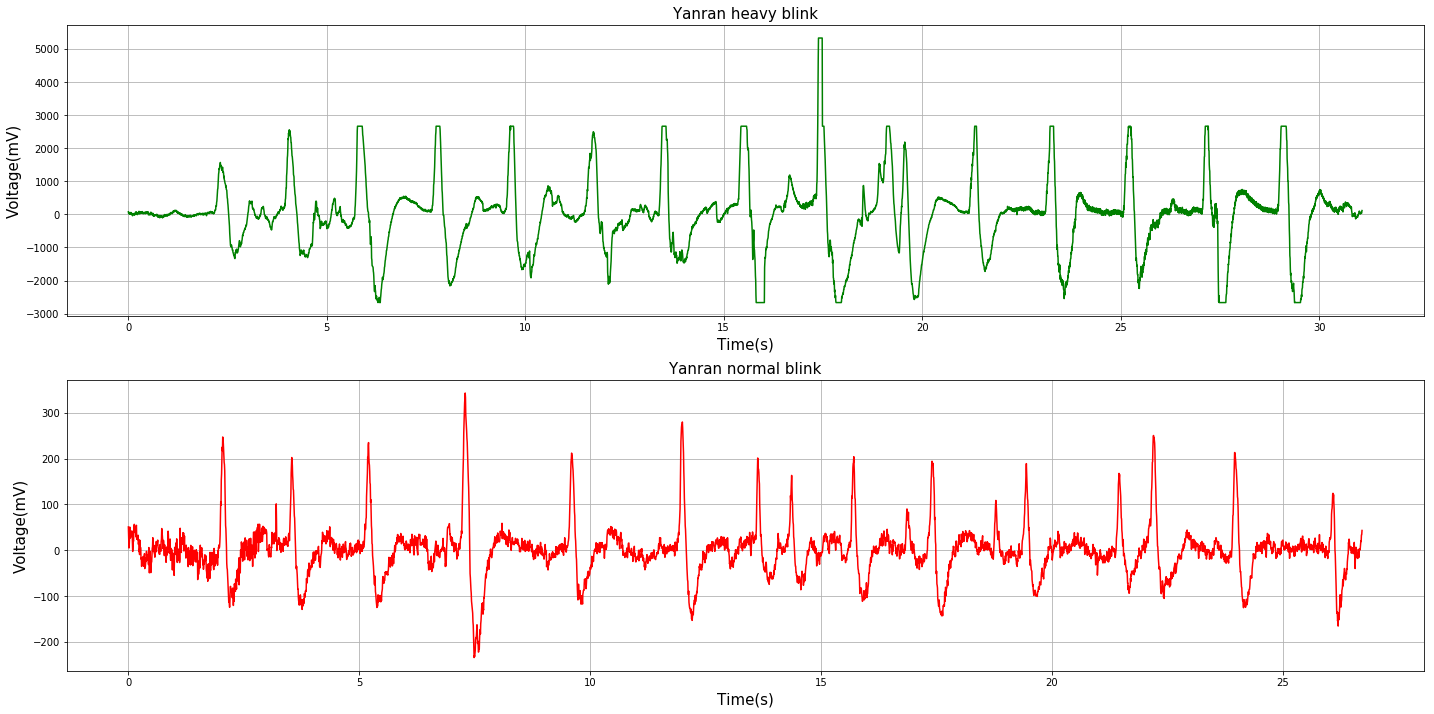

In [5]:
x1 = np.linspace(0,len(arr_yanran_heavy1_blink)/160.6,len(arr_yanran_heavy1_blink))
x2 = np.linspace(0,len(arr_yanran_normal_blink)/160.6,len(arr_yanran_normal_blink))
fig, (ax1, ax2) = plt.subplots(2,figsize = [20,10])
ax1.plot(x1,arr_yanran_heavy1_blink, 'g-')
ax1.set_title('Yanran heavy blink', fontsize = 15)
ax1.set_ylabel('Voltage(mV)',fontsize=15)
ax1.set_xlabel('Time(s)',fontsize = 15)
ax2.plot(x2, arr_yanran_normal_blink, 'r-')
ax2.set_title('Yanran normal blink', fontsize = 15)
ax2.set_ylabel('Voltage(mV)',fontsize=15)
ax2.set_xlabel('Time(s)',fontsize=15)
fig.tight_layout(pad = 1)
ax1.grid()
ax2.grid()
plt.show()

# Yanran head shake, play game and relax data in time domin

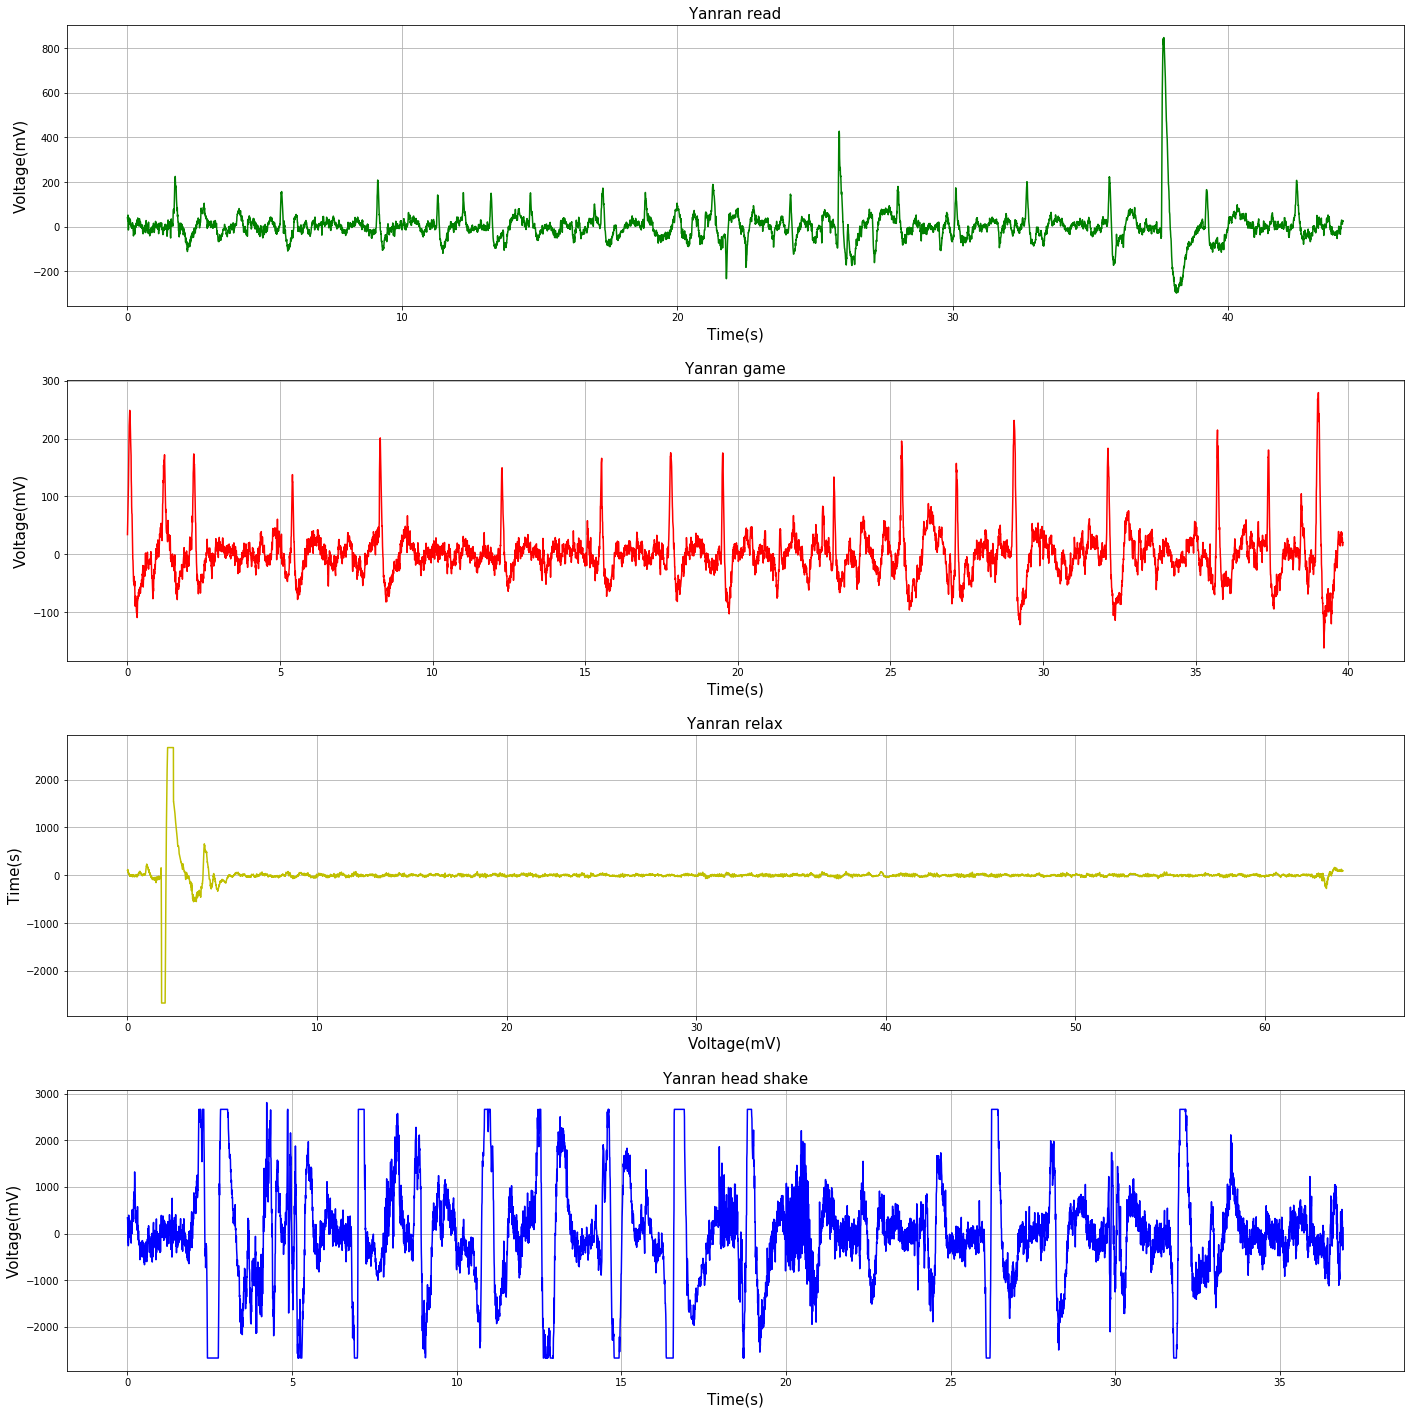

In [6]:
x1 = np.linspace(0,len(arr_yanran_read)/160.6,len(arr_yanran_read))
x2 = np.linspace(0,len(arr_yanran_game)/160.6,len(arr_yanran_game))
x3 = np.linspace(0,len(arr_yanran_relax)/160.6,len(arr_yanran_relax))
x4 = np.linspace(0,len(arr_yanran_head_shake)/160.6,len(arr_yanran_head_shake))
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize = [20,20])

ax1.plot(x1,arr_yanran_read, 'g-')
ax1.set_title('Yanran read', fontsize = 15)
ax1.set_ylabel('Voltage(mV)',fontsize=15)
ax1.set_xlabel('Time(s)',fontsize = 15)

ax2.plot(x2, arr_yanran_game, 'r-')
ax2.set_title('Yanran game', fontsize = 15)
ax2.set_ylabel('Voltage(mV)',fontsize=15)
ax2.set_xlabel('Time(s)',fontsize=15)

ax3.plot(x3,arr_yanran_relax,'y-')
ax3.set_title('Yanran relax',fontsize = 15)
ax3.set_xlabel('Voltage(mV)',fontsize = 15)
ax3.set_ylabel('Time(s)',fontsize = 15)

ax4.plot(x4, arr_yanran_head_shake,'b-')
ax4.set_title('Yanran head shake',fontsize = 15)
ax4.set_xlabel('Time(s)', fontsize = 15)
ax4.set_ylabel('Voltage(mV)',fontsize =15)
fig.tight_layout(pad = 2)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()

# Peak detection in time domin

Peaks 

[ 651  936 1252 1544 1881 2167 2490 2799 3079 3141 3427 3736 4051 4369
 4674] 

 X value : 

[ 4.05436136  5.82931219  7.79732784  9.61587395 11.71467546 13.49585418
 15.50746512 17.43188549 19.17569683 19.56182648 21.34300521 23.26742558
 25.22921333 27.20968478 29.10919356] 

Y value : 

[2557.67981211 2666.66634878 2666.66634878 2666.66634878 2499.72407023
 2666.66634878 2666.66634878 5333.33269755 2666.66634878 2187.88782756
 2666.66634878 2666.66634878 2666.66634878 2666.66634878 2666.66634878]


Text(0.5,1,'Find all peaks')

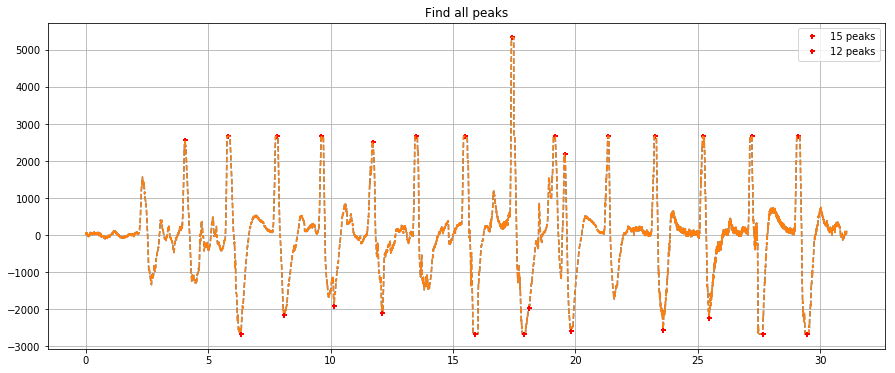

In [13]:
y = arr_yanran_heavy1_blink
x = np.linspace(0,len(arr_yanran_heavy1_blink)/160.6,len(arr_yanran_heavy1_blink))
indexes1 = peakutils.indexes(y,thres=0.6, min_dist=30)
indexes2 = peakutils.indexes(-y,thres=0.9, min_dist=30)
print 'Peaks','\n\n', indexes1,'\n\n',' X value :', '\n\n',x[indexes1],'\n\n','Y value :', '\n\n', y[indexes1]
pyplot.figure(figsize=(15,6))
pplot(x, y, indexes1)
pplot(x, y, indexes2)
plt.grid()
pyplot.title('Find all peaks')

# Find peak for all the eye blink

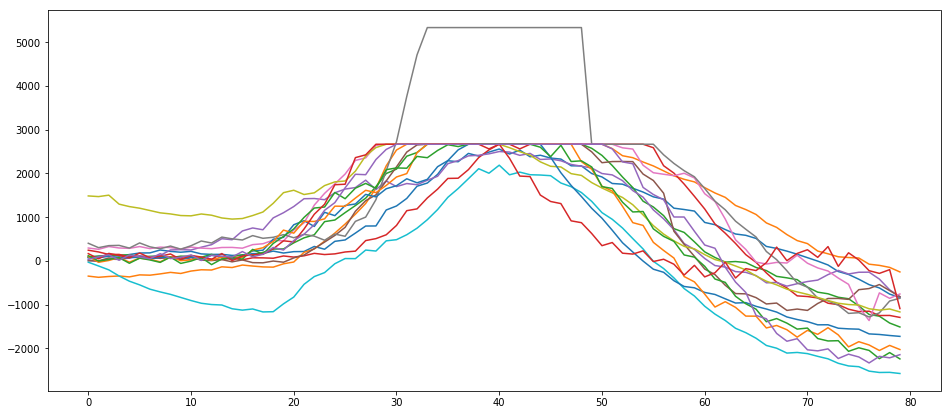

In [17]:
fig= plt.figure(figsize=(16,7))
indexes1 = peakutils.indexes(y,thres=0.6, min_dist=30)
indexes2 = peakutils.indexes(-y,thres=0.9, min_dist=30)
new_arr = np.empty([len(indexes1),80])
for i in range(0,len(indexes1)):
    new_arr[i] = y[int(indexes1[i]-0.25*160):int(indexes1[i]+0.25*160)]
for i in range(0,len(new_arr)):
        plt.plot(new_arr[i])

# Find mean of each column get a final peak

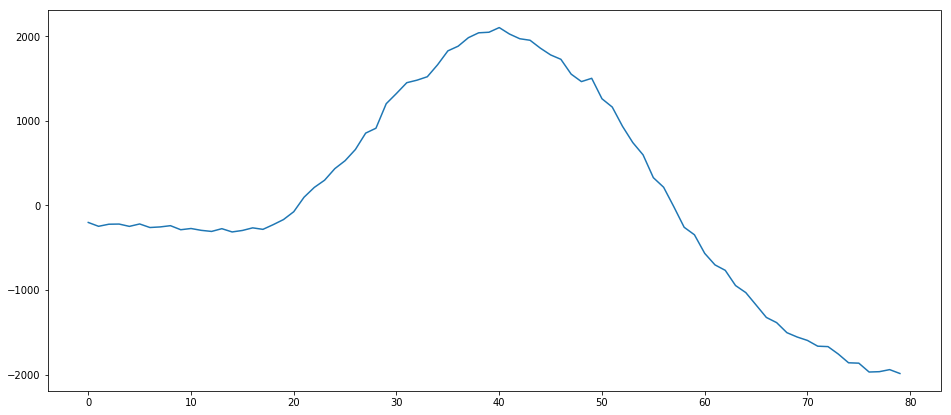

In [18]:
fig = plt.figure(figsize = (16,7))
mean_arr = new_arr.mean(axis=0)
std_arr = new_arr.std(axis=0)
final_arr = mean_arr-std_arr
plt.plot(final_arr)
max_index = np.where(final_arr == max(final_arr))[0]
bar_arr = mean_arr[int(max_index-10):int(max_index+10)]
mean = bar_arr.mean()
std = bar_arr.std()
bar = mean+std

# Find one peak, locate x and y

In [20]:
# y = arr_yanran_heavy_blink[1008:1088]
# x = np.linspace(6.3,6.8,len(arr_yanran_heavy_blink[1008:1088]))
# indexes1 = peakutils.indexes(y, thres=0.8, min_dist=30)
# indexes2 = peakutils.indexes(-y,thres=0.9, min_dist=30)
# #print 'Peaks index','\n\n', indexes,'\n\n',' X value :', '\n\n',x[indexes],'\n\n','Y value :', '\n\n', y[indexes]
# pyplot.figure(figsize=(15,6))
# pplot(x, y, indexes1)
# pplot(x, y, indexes2)
# pyplot.title('First estimate')

In [21]:
# y = arr_yanran_heavy_blink[1168:1248]
# x = np.linspace(7.3,7.8,len(arr_yanran_heavy_blink[1168:1248]))
# indexes1 = peakutils.indexes(y, thres=0.8, min_dist=30)
# indexes2 = peakutils.indexes(-y,thres=0.9, min_dist=30)
# #print 'Peaks index','\n\n', indexes,'\n\n',' X value :', '\n\n',x[indexes],'\n\n','Y value :', '\n\n', y[indexes]
# pyplot.figure(figsize=(15,6))
# pplot(x, y, indexes1)
# pplot(x, y, indexes2)
# pyplot.title('First estimate')

# Blink for 1 sec

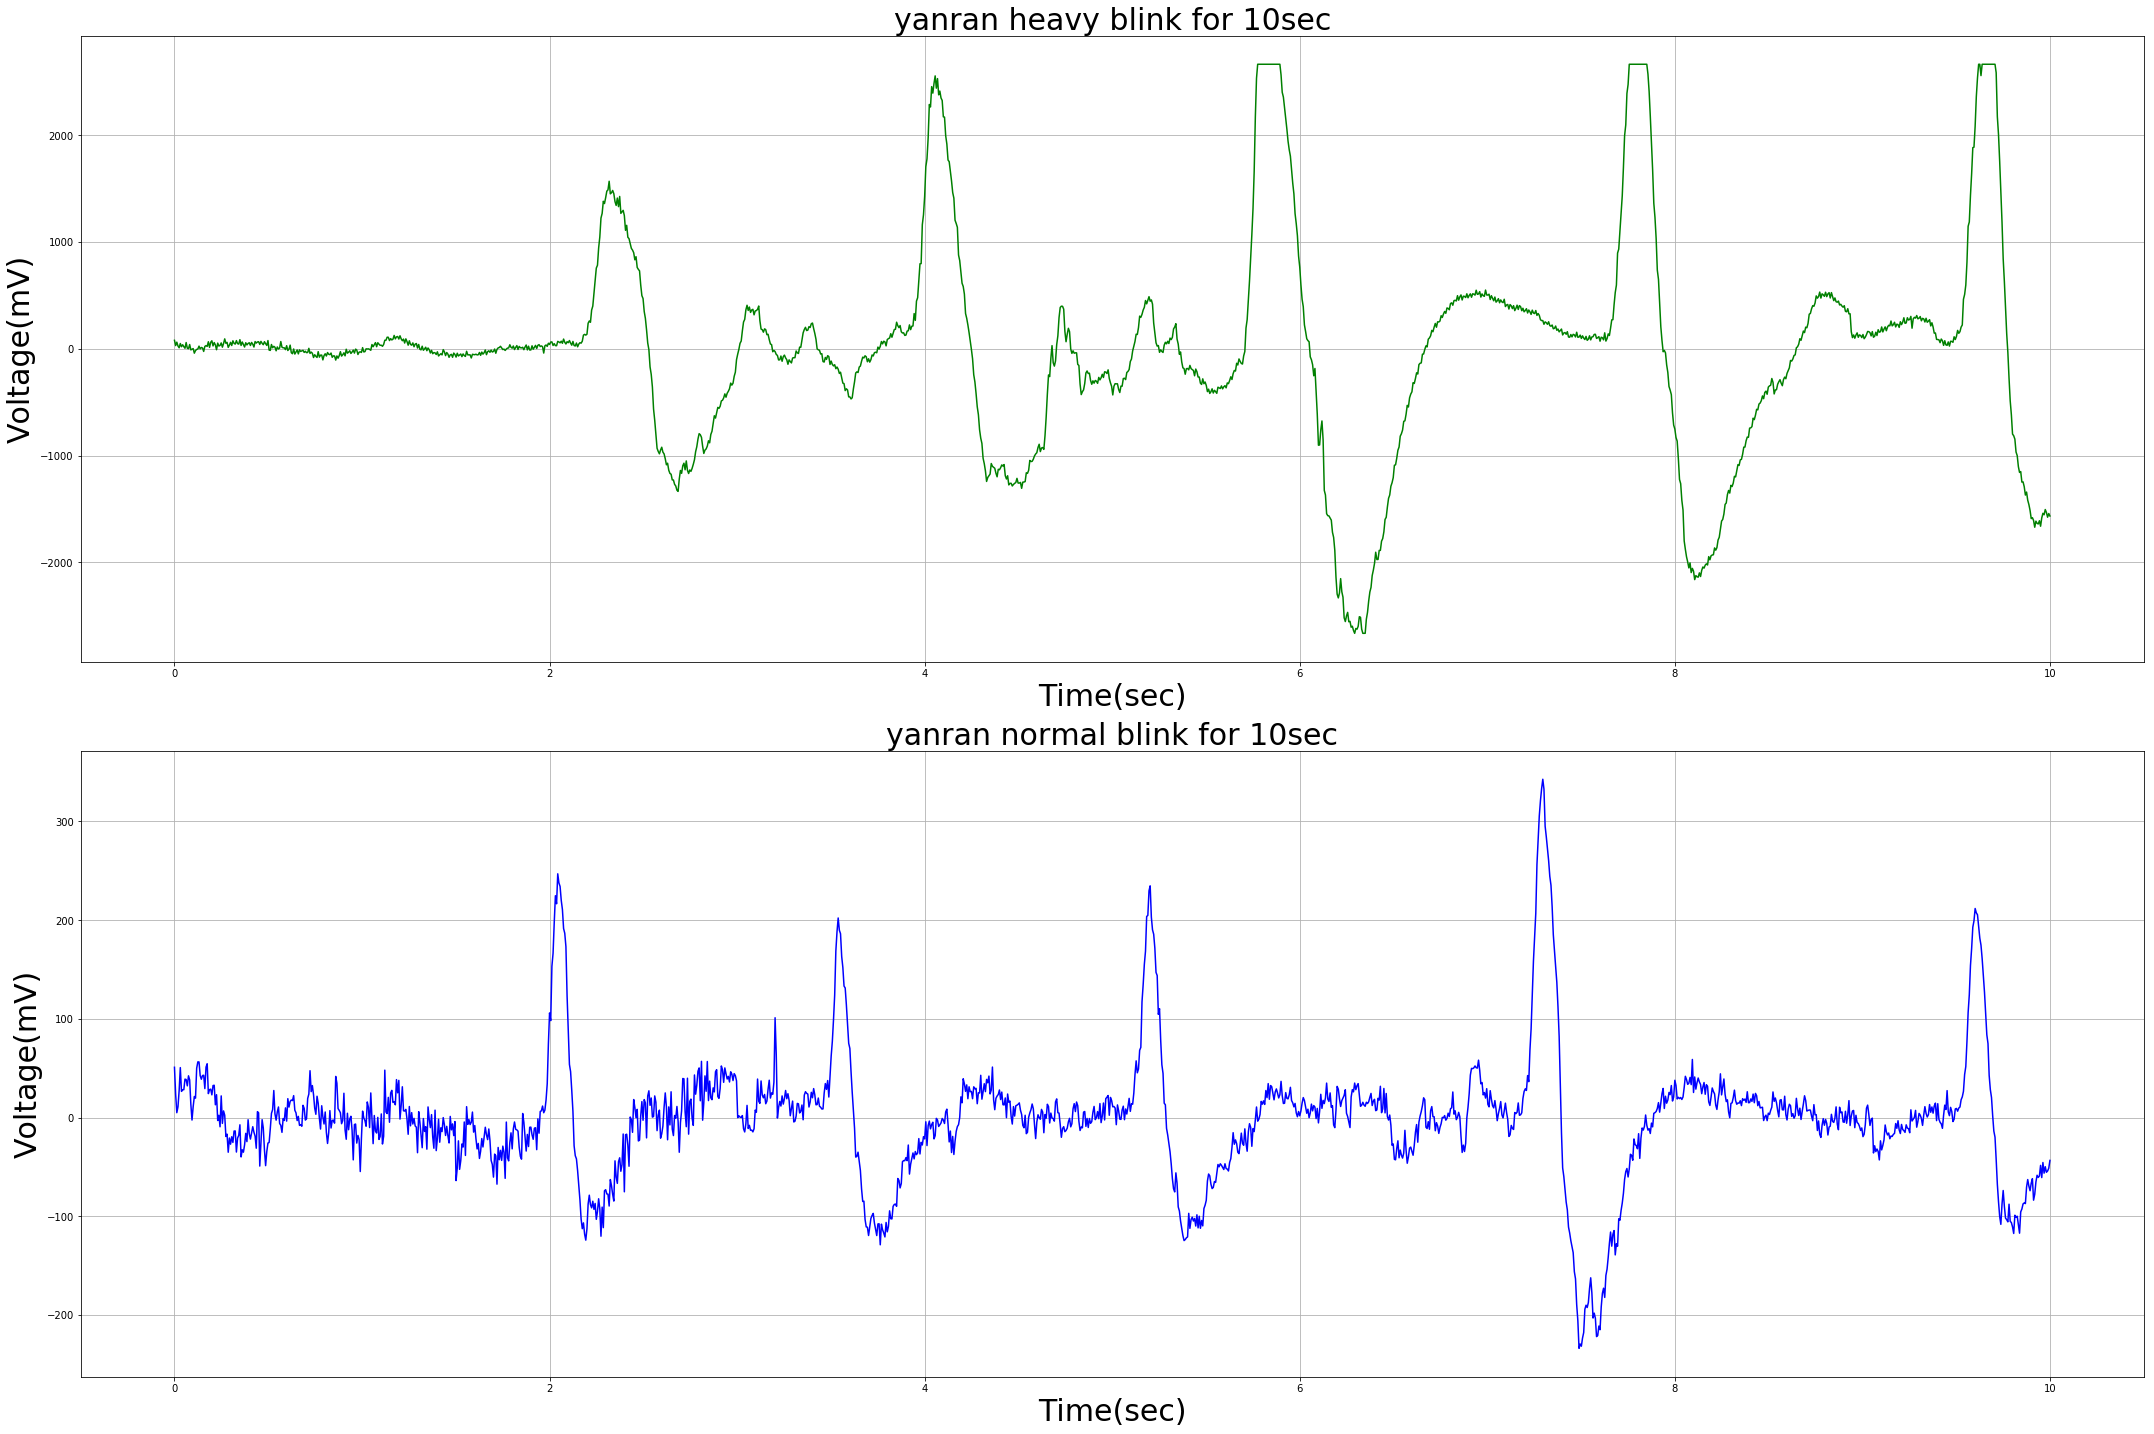

In [24]:
x1 = np.linspace(0,10,1606)
y1 = arr_yanran_heavy1_blink[0:1606]
fig,(ax1,ax2) = plt.subplots(2,figsize=(30,20))
ax1.set_title('yanran heavy blink for 10sec',fontsize=30)
ax1.set_xlabel('Time(sec)',fontsize=30)
ax1.set_ylabel('Voltage(mV)',fontsize=30)
x2 = np.linspace(0,10,1606)
y2 = arr_yanran_normal_blink[0:1606]
ax2.set_title('yanran normal blink for 10sec',fontsize=30)
ax2.set_xlabel("Time(sec)",fontsize=30)
ax2.set_ylabel('Voltage(mV)',fontsize=30)
ax1.plot(x1, y1, 'g-')
ax2.plot(x2,y2,'b-')
fig.tight_layout(pad = 1)
ax1.grid()
ax2.grid()
plt.show()

# Plot all the data in frequency domin

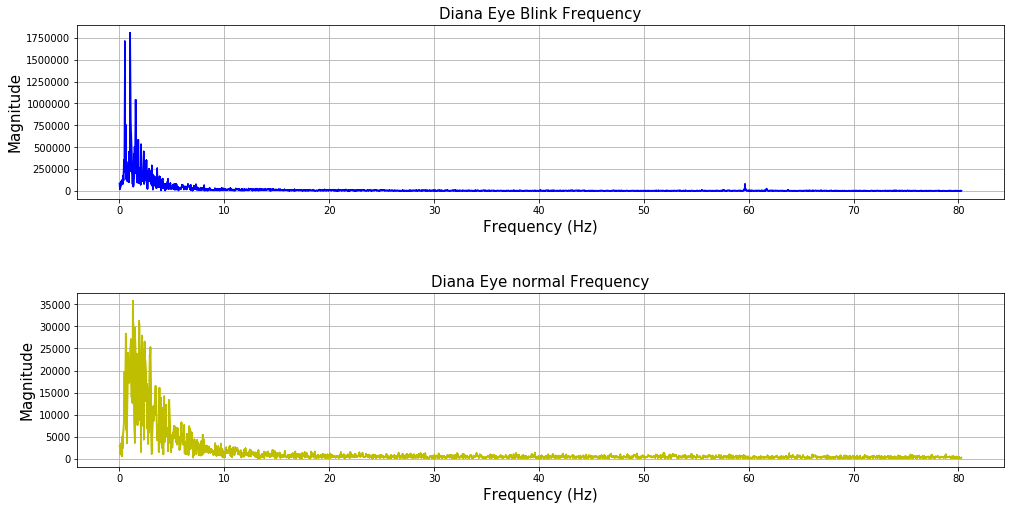

In [26]:
yf1 = np.absolute(scipy.fftpack.fft(arr_yanran_heavy1_blink))
xf1 = np.absolute(np.fft.fftfreq(len(arr_yanran_heavy1_blink), 1/160.6))
fig,(ax1,ax2) =  plt.subplots(2,figsize=[15,8])
ax1.plot(xf1, yf1,'b-')
ax1.set_xlabel("Frequency (Hz)",fontsize = 15)
ax1.set_ylabel('Magnitude',fontsize = 15)
ax1.set_title('Diana Eye Blink Frequency',fontsize=15)
ax1.grid()

yf2 = np.absolute(scipy.fftpack.fft(arr_yanran_normal_blink))
xf2 = np.absolute(np.fft.fftfreq(len(arr_yanran_normal_blink), 1/160.6))
ax2.plot(xf2, yf2,'y-')
ax2.set_xlabel("Frequency (Hz)",fontsize = 15)
ax2.set_ylabel('Magnitude',fontsize = 15)
ax2.set_title('Diana Eye normal Frequency',fontsize=15)
ax2.grid()
fig.tight_layout(pad = 4)
plt.show()

# Plot the data which has frequency <= 50 , set rest of them as 0, remove noise

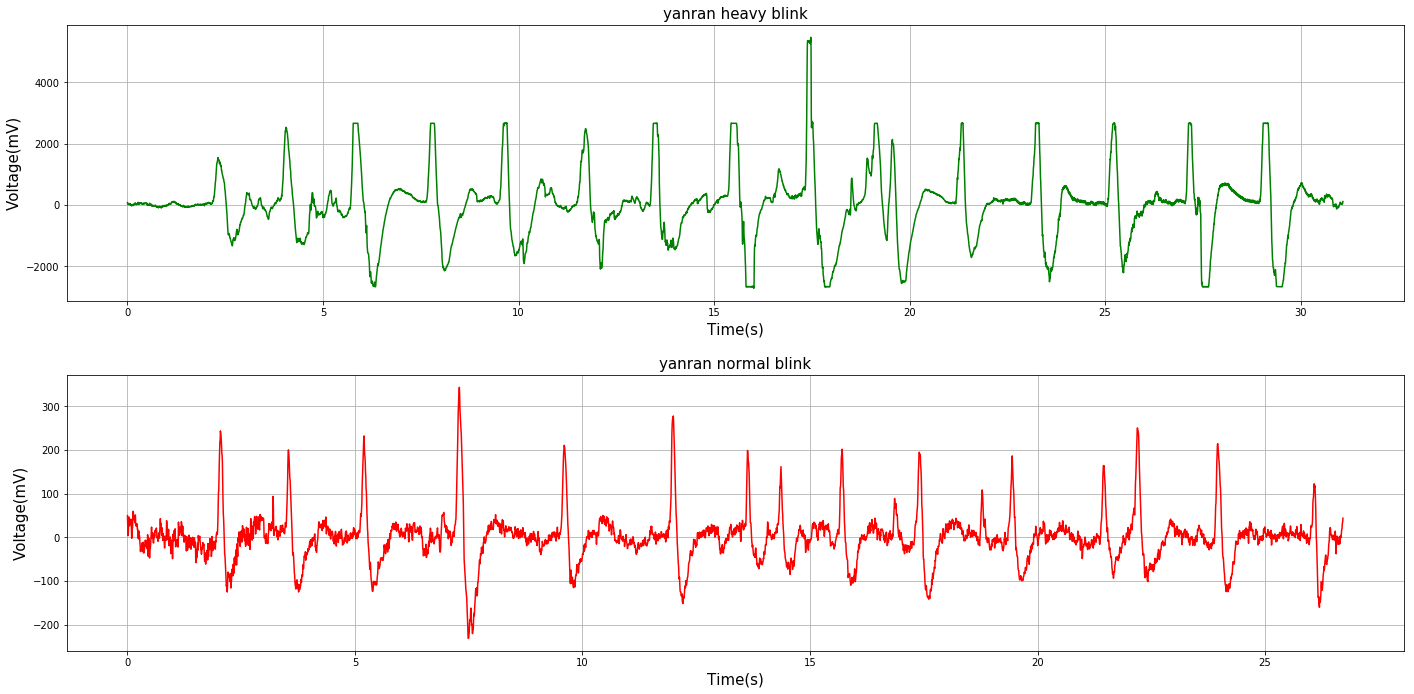

In [32]:
yf1 = scipy.fftpack.fft(arr_yanran_heavy1_blink)
xf1 = np.fft.fftfreq(len(arr_yanran_heavy1_blink), 1/160.6)
yf2 = scipy.fftpack.fft(arr_yanran_normal_blink)
xf2 = np.fft.fftfreq(len(arr_yanran_normal_blink), 1/160.6)
yf1[xf1>50] = 0  
yf2[xf2>50] = 0
y1 = np.fft.ifft(yf1)
y2 = np.fft.ifft(yf2)
x1 = np.linspace(0,len(y1)/160.6,len(y1))
x2 = np.linspace(0,len(y2)/160.6,len(y2))
fig, (ax1, ax2) = plt.subplots(2,figsize = [20,10])
ax1.plot(x1,y1, 'g-')
ax1.set_title('yanran heavy blink', fontsize = 15)
ax1.set_ylabel('Voltage(mV)',fontsize=15)
ax1.set_xlabel('Time(s)',fontsize = 15)
ax2.plot(x2, y2, 'r-')
ax2.set_title('yanran normal blink', fontsize = 15)
ax2.set_ylabel('Voltage(mV)',fontsize=15)
ax2.set_xlabel('Time(s)',fontsize=15)
fig.tight_layout(pad = 2)
ax1.grid()
ax2.grid()
plt.show()

# Calaulte pearson correlation coeficient

In [ ]:
from math import sqrt
def pearson(T2): 
    T1 = [ 277.7334849 ,  315.47673543,  364.19709524,  313.70226542,
 320.97021739,  331.7416509 ,  322.96911875,  324.98168945,
 308.8499705 ,  317.08463033,  305.1220576 ,  294.73400116,
 297.37790426,  285.91918945,  258.42603048,  256.5463384 ,
 248.5297521 ,  238.84741465,  222.64480591,  200.45979818,
 198.20245107,  167.92138418,  157.25072225,  159.30716197,
 146.77047729,  152.96427409,  152.96109517,  143.67008209,
 115.49154917,   93.43655904,   80.49106598,   80.41032155,
 65.56415558,   54.93863424,   33.37637583,   14.64017232,
 13.935407  ,  -10.12007395,  -11.32361094,  -15.02227783,
 -8.28997294,  -15.09062449,  -30.14977773,  -51.65894826,
 -54.78191376,  -91.62394206, -101.7777125 , -112.24619548,
 -129.11923726, -142.46527354, -154.41830953, -154.94759878,
 -164.60577647, -165.70949554, -168.15471649, -203.50138346,
 -232.83259074, -265.19584656, -294.80266571, -312.07466125,
 -332.47820536, -345.24599711, -360.22567749, -384.06562805,
 -392.57176717, -410.03608704, -410.37623088, -437.73269653,
 -430.96065521, -426.85476939, -425.87757111, -419.15384928,
 -399.98181661, -403.84991964, -385.79495748, -363.85059357,
 -362.51831055, -362.43756612, -348.28726451, -333.94845327]
    
    sum1 = sum(T1)

    sum2 = sum(T2)
    
    cnt = len(T1)

    sqSum1 = sum(pow(num,2) for num in T1)

    sqSum2 = sum(pow(num,2) for num in T2)

    mulSum = sum(T1[i]*T2[i] for i in range(cnt))

    son = mulSum-sum1*sum2/cnt

    mot = sqrt( (sqSum1-pow(sum1,2)/cnt)*(sqSum2-pow(sum2,2)/cnt))
    
    skew = abs(stats.skew(T1))  
    
    kurtosis = abs(stats.kurtosis(T1))
    
    s_k  = skew + kertosis

    r = son/mot
        
    if r >= 0.8 & s_k > 1.3 :
        
        print 'heavy blink'
        
    else:
        
        print 'normal blink'
    